# Understanding Descriptive Statistics

Import the necessary libraries here:

In [143]:
# Libraries
import random
import pandas as pd
import numpy as np
import math

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [144]:
# your code here
def ten_times_dice():
    global lista
    lista=[]
    for i in range (10):
        a=random.choice([1,2,3,4,5,6])
        lista.append(a)   
    return (lista)

In [145]:
ten_times_dice()
data_arr=np.array(lista)
print(data_arr)

[1 4 6 6 6 6 4 3 3 3]


In [146]:
data_df=pd.DataFrame(data_arr,columns=["Result"]).reset_index()
data_df_renamed= data_df.rename(columns={'index':'roll'})
data_df_renamed["Roll"] = data_df_renamed["roll"] + 1
data_df_renamed_final = data_df_renamed[["Roll", "Result"]]
data_sorted=data_df_renamed_final.sort_values('Result').reset_index()
data_sorted_final = data_df_renamed[["Roll", "Result"]].sort_values("Result")
display(data_sorted_final)


,Roll,Result
0,1,1
7,8,3
8,9,3
9,10,3
1,2,4
6,7,4
2,3,6
3,4,6
4,5,6
5,6,6


#### 2.- Plot the results sorted by value.

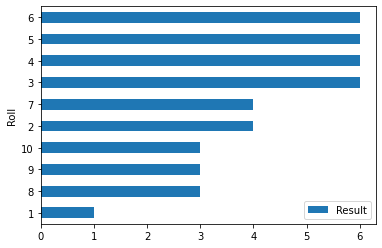

In [147]:
# your code here
data_sorted.plot.barh(x="Roll", y="Result");



#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

,Roll,Result
0,6,4
1,3,3
2,4,2
3,1,1


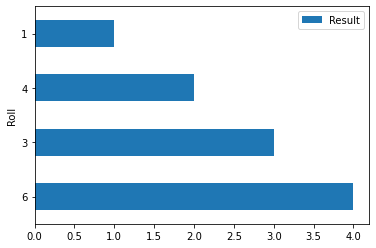

In [148]:
# your code here
a=data_df_renamed_final['Result'].value_counts().reset_index()
a_renamed= a.rename(columns={'index':'Roll'})

a_renamed.plot.barh(y="Result",x="Roll")
display(a_renamed)


In [149]:
"""
your comments here
The frequency distribution plots show the cummulative number of events for each result. 
(The number columns for each result value in the results plot is equal to the number on the x axis for each result value in the frequency distrubution )
"""

'\nyour comments here\nThe frequency distribution plots show the cummulative number of events for each result. \n(The number columns for each result value in the results plot is equal to the number on the x axis for each result value in the frequency distrubution )\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [150]:
#extracting values with loc
display(data_sorted_final)
a=data_sorted_final.loc[0,"Result"]
print(a)
type(a)

,Roll,Result
0,1,1
7,8,3
8,9,3
9,10,3
1,2,4
6,7,4
2,3,6
3,4,6
4,5,6
5,6,6


1


numpy.int64

In [151]:
#obtaining number of rows with df.index
index=data_sorted_final.index
num_rows=(len(index))

num_rows=(len(data_sorted_final.index))


In [152]:
#obtaining the sum value of every row
sum_value=0
for i in range(num_rows):
    value=data_sorted_final.loc[i,"Result"]
    sum_value=sum_value+value

In [153]:
#obtaining the average value
avg_val=sum_value/num_rows
print(avg_val)

4.2


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [154]:
# your code here
def mean_calculation(df,column):
    num_rows=(len(df.index))
    sum_value=0
    for i in range(num_rows):
        value=df.iloc[i,column]
        sum_value=sum_value+value
    return sum_value/num_rows  

In [155]:
mean_calculation(data_sorted_final,1)

4.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [156]:
# your code here
def median_calculation(df,column):
    num_rows=(len(df.index))
    global rows
    rows=int(math.modf(num_rows/2)[1])
    if num_rows%2==0:
        median1=df.iloc[rows-1,column]
        median2=df.iloc[(rows),column]
        median=(median1+median2)/2
    else:
        median=df.iloc[rows,column]
    return median

In [157]:
#before appliying the function, I must make sure that I align the index with the ordered by value df
data_sorted_final.reset_index(drop=True, inplace=True)

In [158]:
#I chose the result column to apply the function
median_calculation(data_sorted_final,1)

4.0

In [159]:
display(data_sorted_final)
print(data_sorted_final.iloc[rows,1])
print(data_sorted_final.iloc[(rows)+1,1])

,Roll,Result
0,1,1
1,8,3
2,9,3
3,10,3
4,2,4
5,7,4
6,3,6
7,4,6
8,5,6
9,6,6


4
6


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [169]:
def quartile_calculation(df,column):
    num_rows=(len(df.index))
    global rows
    rows=int(math.modf(num_rows/2)[1])
    if num_rows%2==0:
        median1=df.iloc[rows-1,column]
        median2=df.iloc[(rows),column]
        median=(median1+median2)/2
        fq_df=df.loc[:rows-1,:]
        quartile1=median_calculation(fq_df,column)
        tq_df=df.loc[rows:,:]
        quartile3=median_calculation(tq_df,column)     
    else:
        median=df.iloc[rows,column]
        fq_df=df.loc[:rows-1,:]
        quartile1=median_calculation(fq_df,column)
        tq_df=df.loc[rows+2:,:]
        quartile3=median_calculation(tq_df,column) 
        
    return (quartile1,median,quartile3)

In [171]:
quartile_calculation(data_sorted_final,1)

(3, 4.0, 5.0)

In [ ]:
# your code here

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [181]:
# your code here
data=pd.read_csv('/home/davidgozalo/Ironhack/dataptmad0420/module-2/descriptive-stats/data/roll_the_dice_hundred.csv')

In [182]:
display(data)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  100 non-null    int64
 1   roll        100 non-null    int64
 2   value       100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [191]:
data_renamed=data[["roll", "value"]].sort_values('value')
#sort_values("Result")

In [ ]:
data.sort_values("Name", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 

In [194]:
data_renamed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   roll    100 non-null    int64
 1   value   100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


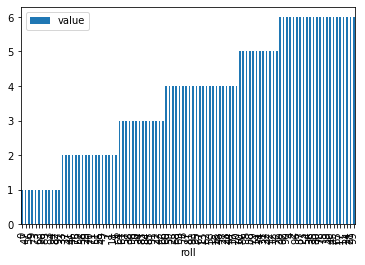

In [198]:
data_renamed.plot.bar(x='roll', y='value');

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [199]:
# your code here
def mean_calculation(df,column):
    num_rows=(len(df.index))
    sum_value=0
    for i in range(num_rows):
        value=df.iloc[i,column]
        sum_value=sum_value+value
    return sum_value/num_rows  

In [200]:
mean_calculation(data_renamed,1)

3.74

#### 3.- Now, calculate the frequency distribution.


In [201]:
# your code here
data_renamed["value"].value_counts() 

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [ ]:
# your code here

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [ ]:
# your code here

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""